In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
# train_data = "/Users/swayampalrecha/Desktop/BDA Project/archive/train-data.csv"
train_data = os.getcwd() + "/archive/train-data.csv"
train_data

'/Users/swayampalrecha/Desktop/BDA Project/archive/train-data.csv'

In [3]:
df = pd.read_csv(train_data)

In [4]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [5]:
df = df.drop(df.columns[0],axis=1,)

In [6]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [7]:
df.shape

(6019, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [9]:
df.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [10]:
df.drop(columns=['New_Price'], inplace=True)

In [11]:
df['Mileage'] = df['Mileage'].str.split(expand=True)[0].astype(float)

In [12]:
df['Engine'] = df['Engine'].str.split(expand=True)[0].astype(float)

In [13]:
df['Power'] = df['Power'].replace('null bhp', None)
df['Power'] = df['Power'].str.split(expand=True)[0].astype(float)

In [14]:
df.isna().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
Price                  0
dtype: int64

### Replacing the NA values with Mean of that column

In [15]:
df['Mileage'].fillna(df['Mileage'].mean(), inplace=True)
df['Engine'].fillna(df['Engine'].mean(), inplace=True)
df['Power'].fillna(df['Power'].mean(), inplace=True)
df['Seats'].fillna(df['Seats'].mean(), inplace=True)

In [16]:
df.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [17]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


### Outlier Removal Later

### Removal of Erroneous datapoints

In [18]:
(df['Seats'].min(),df['Mileage'].min(),df['Engine'].min(),df['Power'].min(),df['Price'].min(),df['Year'].min())

(0.0, 0.0, 72.0, 34.2, 0.44, 1998)

In [19]:
df = df[df['Seats'] != 0]
df = df[df['Mileage'] != 0]

In [20]:
df.sample()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
2909,Hyundai Santro Xing GLS,Hyderabad,2008,95291,Petrol,Manual,First,17.92,1086.0,62.1,5.0,2.3


In [21]:
df['Company'] = df['Name'].str.split(expand=True)[0].str.lower()
df['Model'] = df['Name'].str.split().str[0:2].str.join(' ').str.lower()
df.drop(columns = ['Name'],inplace = True)

In [22]:
df.insert(0, 'Company', df.pop('Company'))
df.insert(1,'Model', df.pop('Model'))

In [23]:
df.sample()

,Company,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
5076,volkswagen,volkswagen polo,Kolkata,2013,45000,Diesel,Manual,First,22.07,1199.0,73.9,5.0,3.25


In [24]:
df['Company'].nunique() , df['Model'].nunique()

(29, 211)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5950 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            5950 non-null   object 
 1   Model              5950 non-null   object 
 2   Location           5950 non-null   object 
 3   Year               5950 non-null   int64  
 4   Kilometers_Driven  5950 non-null   int64  
 5   Fuel_Type          5950 non-null   object 
 6   Transmission       5950 non-null   object 
 7   Owner_Type         5950 non-null   object 
 8   Mileage            5950 non-null   float64
 9   Engine             5950 non-null   float64
 10  Power              5950 non-null   float64
 11  Seats              5950 non-null   float64
 12  Price              5950 non-null   float64
dtypes: float64(5), int64(2), object(6)
memory usage: 650.8+ KB


### Visual ( Graphical ) Analysis

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

#### COMPANY

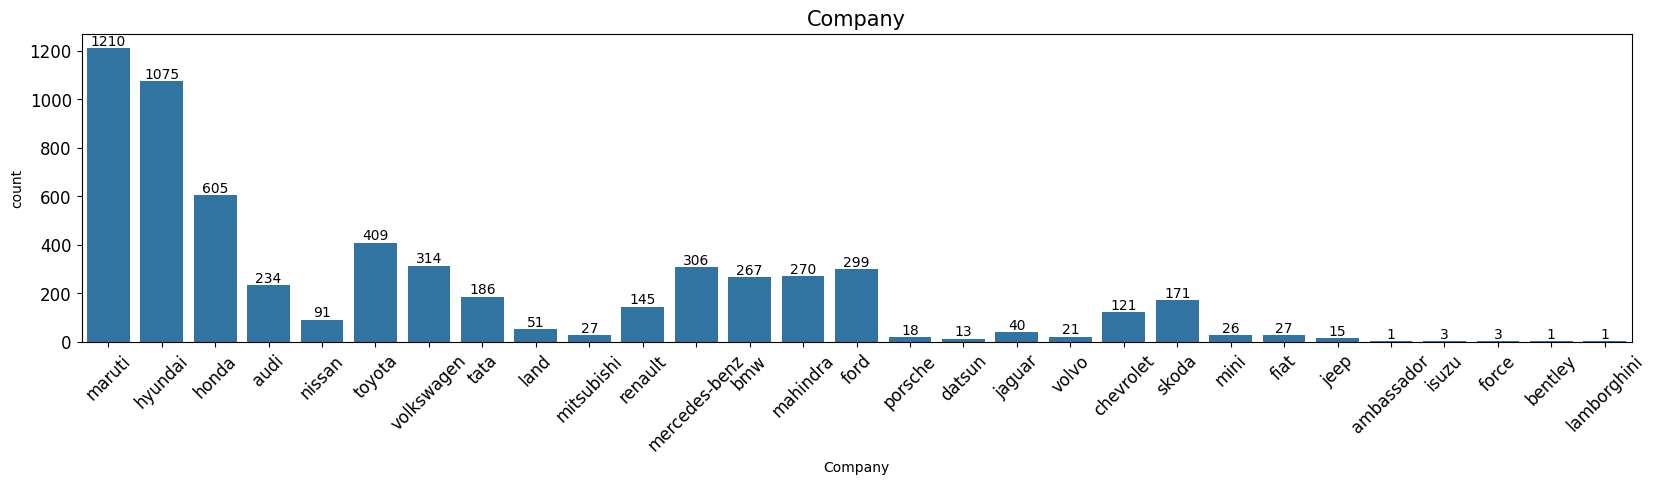

In [27]:
plt.figure(figsize=(20, 4), dpi=100)
graph = sns.countplot(data=df, x='Company')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Company', fontsize=15)
for count in graph.containers:
        graph.bar_label(count)  
plt.show()

#### LOCATION

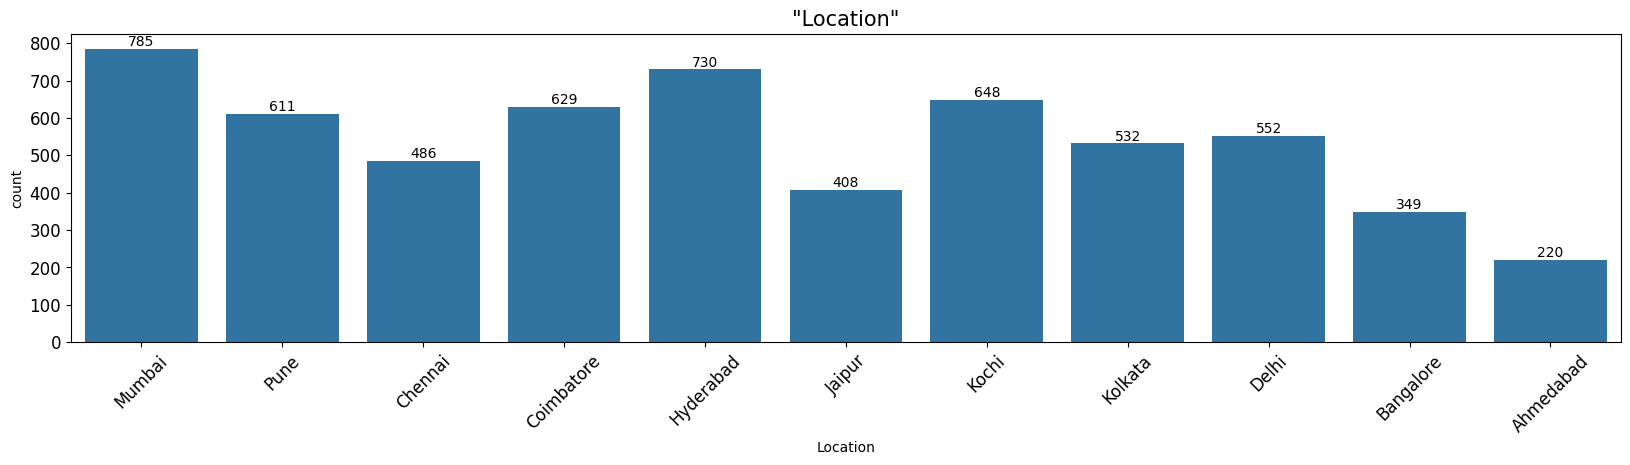

In [28]:
plt.figure(figsize=(20,4), dpi=100)
graph = sns.countplot(data=df, x='Location')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title('"Location"', fontsize=15)
for cont in graph.containers:
        graph.bar_label(cont)
plt.show()

#### FUEL TYPE

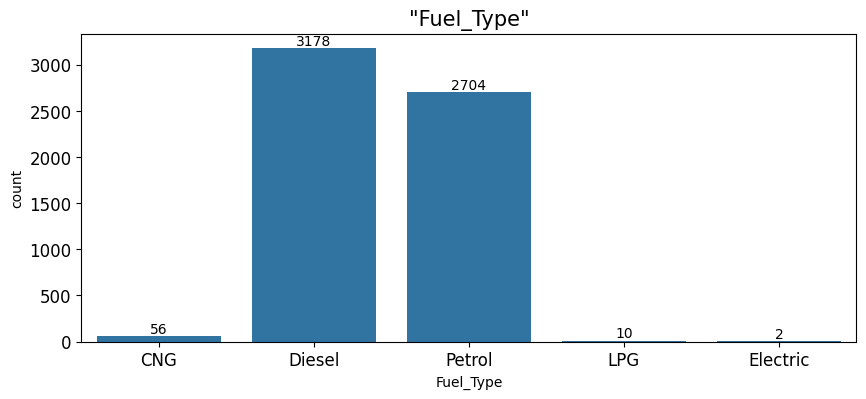

In [29]:
plt.figure(figsize=(10, 4), dpi=100)
graph = sns.countplot(data=df, x='Fuel_Type')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.title('"Fuel_Type"', fontsize=15)
for cont in graph.containers:
        graph.bar_label(cont)
plt.show()

### Categorical Values ( Encoding )

In [30]:
Category_Cols = ['Company', 'Model', 'Location', 'Owner_Type', 'Fuel_Type', 'Transmission']

df = pd.get_dummies(df, columns=Category_Cols, drop_first=True)
df.head(5)

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Company_audi,Company_bentley,Company_bmw,...,Location_Mumbai,Location_Pune,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2010,72000,26.60,998.0,58.16,5.0,1.75,False,False,False,...,True,False,False,False,False,False,False,False,False,True
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,False,False,False,...,False,True,False,False,False,True,False,False,False,True
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,False,False,False,...,False,False,False,False,False,False,False,False,True,True
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,False,False,False,...,False,False,False,False,False,True,False,False,False,True
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,True,False,False,...,False,False,False,True,False,True,False,False,False,False


## MODELS

In [31]:
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report

In [32]:
X = df.drop('Price', axis=1)
y = df['Price']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ',y_test.shape)


X_train:  (4760, 262)
X_test:  (1190, 262)
y_train:  (4760,)
y_test:  (1190,)


### Linear Regression

In [35]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

#### Utility Function to Evaluate our Models Accuracy

In [36]:
def score(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r_squared = r2_score(y_test, y_pred)
    return mae, mse, rmse, r_squared

In [37]:
y_pred_1 = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = score(y_test, y_pred_1)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)



MAE: 2.5648929270804146
MSE: 31.284437221055654
RMSE: 5.593249254329335
R2 Score: 0.7642509424957985


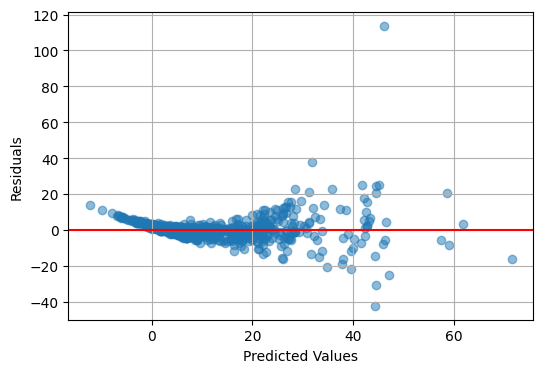

In [38]:
residuals = y_test - y_pred_1
plt.figure(figsize=(6, 4))
plt.scatter(y_pred_1, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

### Ridge Regression

In [39]:
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [40]:
y_pred_2 = ridge.predict(X_test)

mae, mse, rmse, r_squared = score(y_test, y_pred_2)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

MAE: 2.6016325888441596
MSE: 30.860866323922203
RMSE: 5.55525573884067
R2 Score: 0.7674428311361419


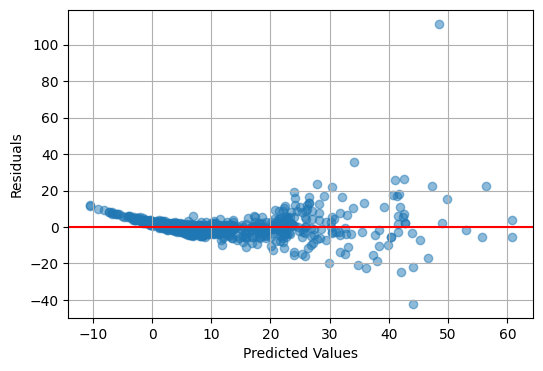

In [41]:
residuals = y_test - y_pred_2
plt.figure(figsize=(6, 4))
plt.scatter(y_pred_2, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

### Random Forest Regression

In [42]:
random_forest = RandomForestRegressor(n_estimators=50, max_depth=10, min_samples_split=5)
random_forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=5, n_estimators=50)

In [43]:
y_pred_3 = random_forest.predict(X_test)

mae, mse, rmse, r_squared = score(y_test, y_pred_3)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

MAE: 1.630154560454084
MSE: 21.565280564093204
RMSE: 4.643843296677139
R2 Score: 0.8374912570146246


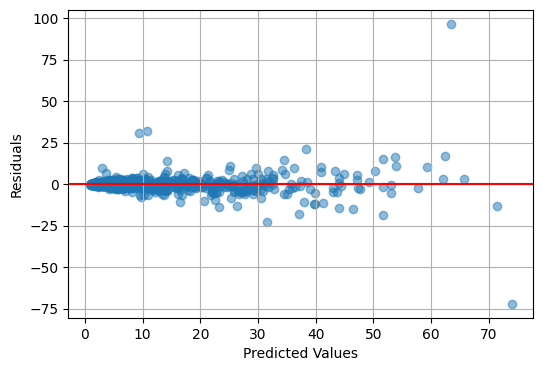

In [44]:
residuals = y_test - y_pred_3
plt.figure(figsize=(6, 4))
plt.scatter(y_pred_3, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

### Decision Tree Regression

In [45]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [46]:
y_pred_4 = decision_tree.predict(X_test)

mae, mse, rmse, r_squared = score(y_test, y_pred_4)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

MAE: 1.9034495798319329
MSE: 26.925045819327732
RMSE: 5.188934940749183
R2 Score: 0.7971018583357543


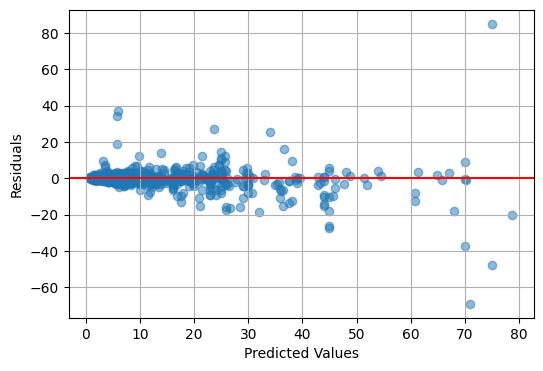

In [47]:
residuals = y_test - y_pred_4
plt.figure(figsize=(6, 4))
plt.scatter(y_pred_4, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

### Gradient Boosting

In [48]:
import xgboost as xgb

In [49]:
gradient_boosting = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                           max_depth = 5, alpha = 10, n_estimators = 100)
gradient_boosting.fit(X_train, y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [50]:
y_pred_5 = gradient_boosting.predict(X_test)
mae, mse, rmse, r_squared = score(y_test, y_pred_5)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)




MAE: 1.5907233108792986
MSE: 17.677305455956912
RMSE: 4.204438780141401
R2 Score: 0.866789737305842


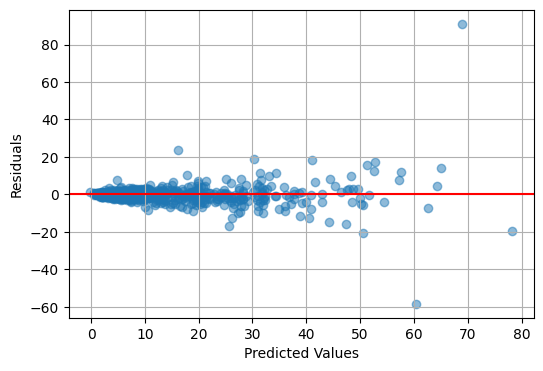

In [51]:
residuals = y_test - y_pred_5
plt.figure(figsize=(6, 4))
plt.scatter(y_pred_5, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

### Support Vector Machines

In [52]:
from sklearn.svm import SVR
svm_reg = SVR(kernel='linear')
svm_reg.fit(X_train, y_train)


SVR(kernel='linear')

In [53]:
y_pred_6 = svm_reg.predict(X_test)
mae, mse, rmse, r_squared = score(y_test, y_pred_6)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)


MAE: 1123.57807269167
MSE: 3772638.128870046
RMSE: 1942.3280178358254
R2 Score: -28428.339383702554


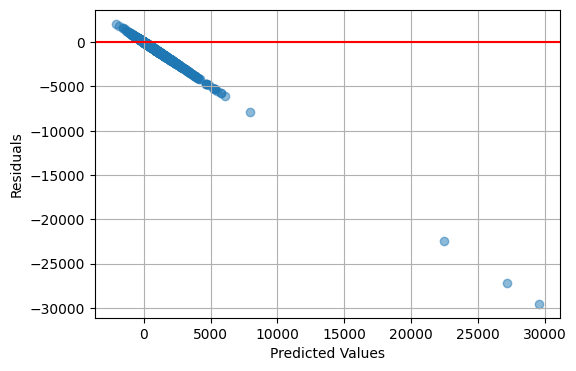

In [54]:
residuals = y_test - y_pred_6
plt.figure(figsize=(6, 4))
plt.scatter(y_pred_6, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

## All Models Visualised

In [56]:
slope_1, intercept_1 = np.polyfit(y_test, y_pred_1, 1)
slope_2, intercept_2 = np.polyfit(y_test, y_pred_2, 1)
slope_3, intercept_3 = np.polyfit(y_test, y_pred_3, 1)
slope_4, intercept_4 = np.polyfit(y_test, y_pred_4, 1)
slope_5, intercept_5 = np.polyfit(y_test, y_pred_5, 1)
slope_6, intercept_6 = np.polyfit(y_test, y_pred_6, 1)


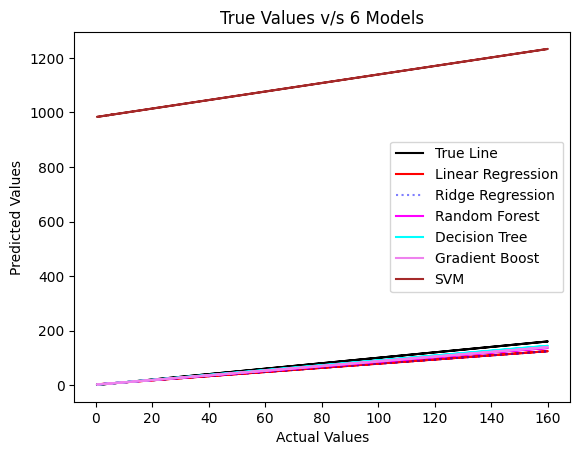

In [60]:
plt.plot(y_test, y_test, color='black', label='True Line')
plt.plot(y_test, slope_1*y_test + intercept_1, color='red', label='Linear Regression')
plt.plot(y_test, slope_2*y_test + intercept_2, color='blue', label='Ridge Regression',linestyle=':', alpha=0.5)
plt.plot(y_test, slope_3*y_test + intercept_3, color='magenta', label='Random Forest')
plt.plot(y_test, slope_4*y_test + intercept_4, color='cyan', label='Decision Tree')
plt.plot(y_test, slope_5*y_test + intercept_5, color='violet', label='Gradient Boost')
plt.plot(y_test, slope_6*y_test + intercept_6, color='brown', label='SVM')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('True Values v/s 6 Models')
plt.legend()
plt.show()

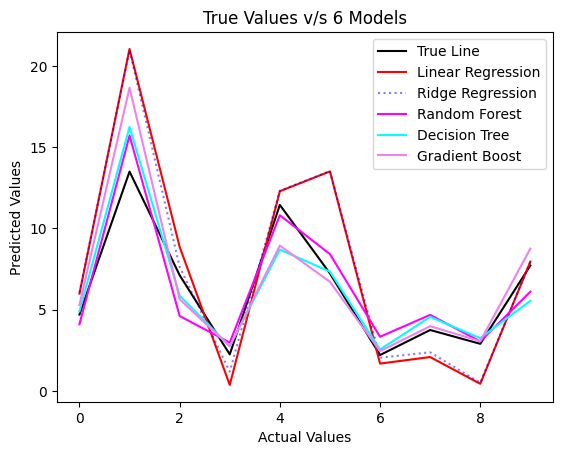

In [65]:
#Without SVM
plt.plot(range(len(y_test))[:10], y_test[:10], color='black', label='True Line')
plt.plot(range(len(y_test))[:10], y_pred_1[:10], color='red', label='Linear Regression')
plt.plot(range(len(y_test))[:10], y_pred_2[:10], color='blue', label='Ridge Regression',linestyle=':', alpha=0.5)
plt.plot(range(len(y_test))[:10], y_pred_3[:10], color='magenta', label='Random Forest')
plt.plot(range(len(y_test))[:10], y_pred_4[:10], color='cyan', label='Decision Tree')
plt.plot(range(len(y_test))[:10], y_pred_5[:10], color='violet', label='Gradient Boost')
# plt.plot(y_test, slope_6*y_test + intercept_6, color='brown', label='SVM')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('True Values v/s 6 Models')
plt.legend()
plt.show()